In [3]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import plotly.express as px
import joblib

import warnings
warnings.filterwarnings('ignore')

**Problem Statement**
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.


**Discription**
* country	Name of the country
*	child_mort	Death of children under 5 years of age per 1000 live births
*	exports	Exports of goods and services per capita. Given as %age of the GDP per capita
*	health	Total health spending per capita. Given as %age of GDP per capita
*	imports	Imports of goods and services per capita. Given as %age of the GDP per capita
*	Income	Net income per person
*	Inflation	The measurement of the annual growth rate of the Total GDP
*	life_expec	The average number of years a new born child would live if the current mortality patterns are to remain the same
*	total_fer	The number of children that would be born to each woman if the current age-fertility rates remain the same.
*	gdpp	The GDP per capita. Calculated as the Total GDP divided by the total population.

In [5]:
data=pd.read_csv('Country-data.csv')
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [6]:
data.shape

(167, 10)

In [7]:
## Lets explore the data
data.shape

(167, 10)

In [8]:
data.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

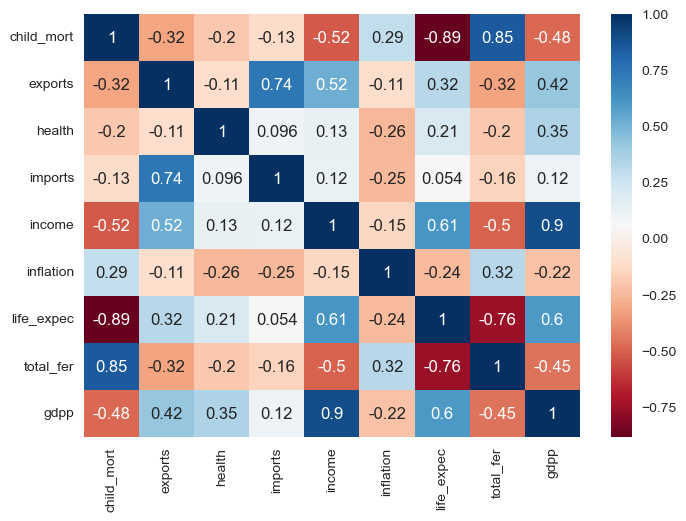

In [9]:
# Correlation heatmap
sns.heatmap(data.corr(numeric_only=True),annot=True,vmax=1,cmap='RdBu')
plt.show()

## Visualize the data

In [10]:
data

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [11]:
# Before We begin visualization lets convert country to index(As it's reductant column)
data.set_index('country',inplace=True)

In [12]:
data.head(2)

child_mort  exports  health  imports  income  inflation  \
country                                                                
Afghanistan        90.2     10.0    7.58     44.9    1610       9.44   
Albania            16.6     28.0    6.55     48.6    9930       4.49   

             life_expec  total_fer  gdpp  
country                                   
Afghanistan        56.2       5.82   553  
Albania            76.3       1.65  4090

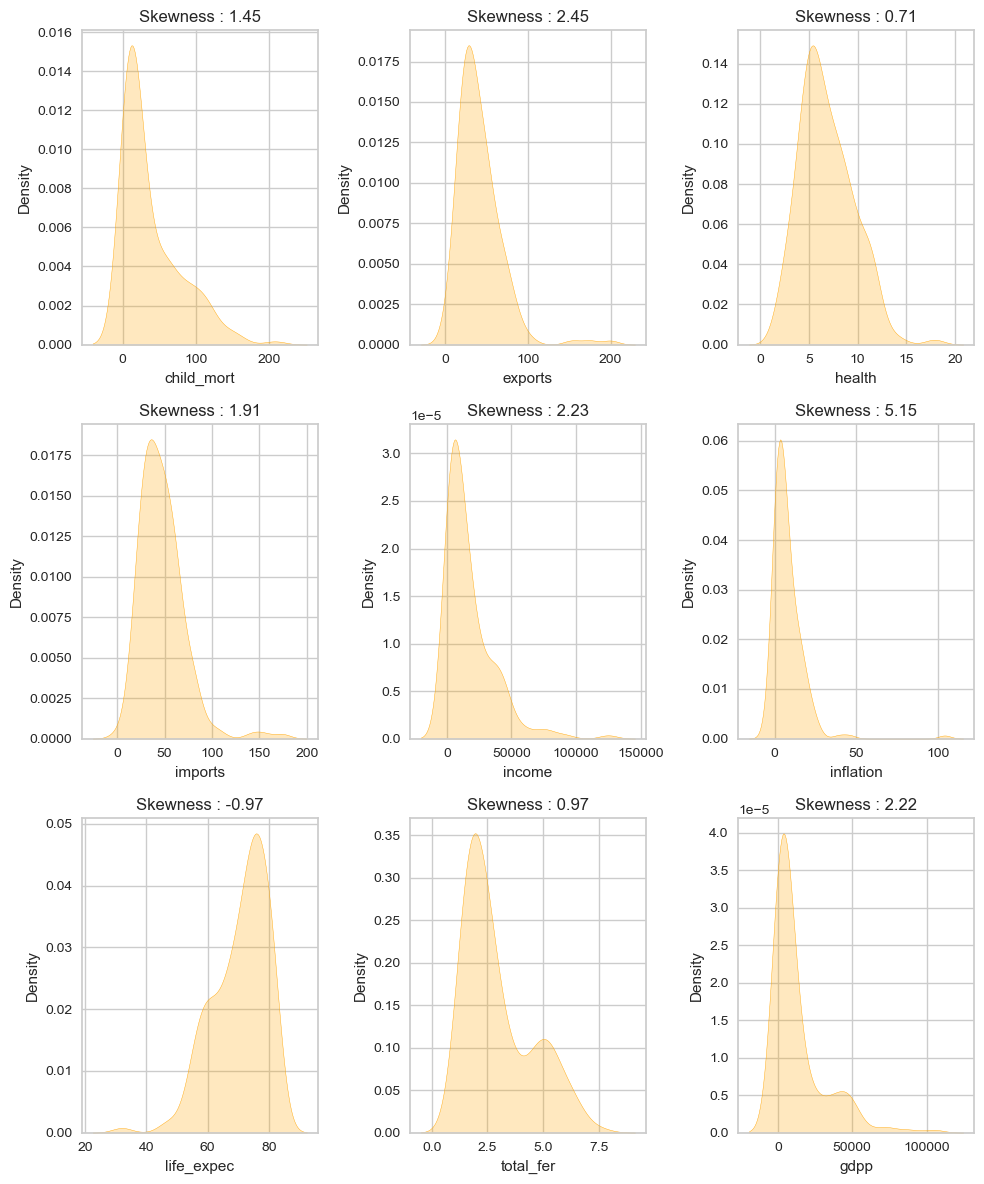

In [13]:
# LEts do the univariate analysis
t=1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.kdeplot(data=data,x=i,fill=True,color='orange')
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

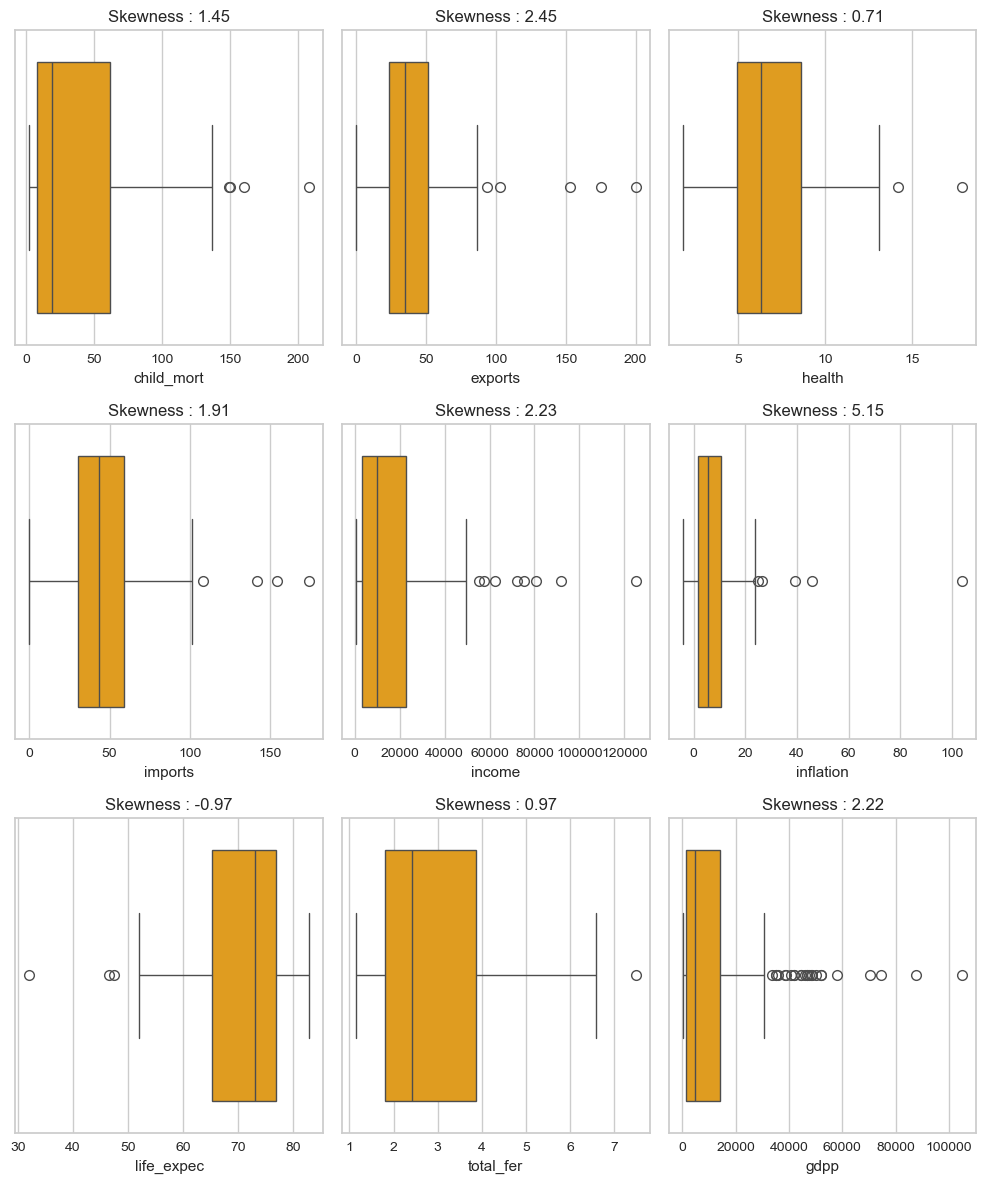

In [14]:
t=1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='orange')
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

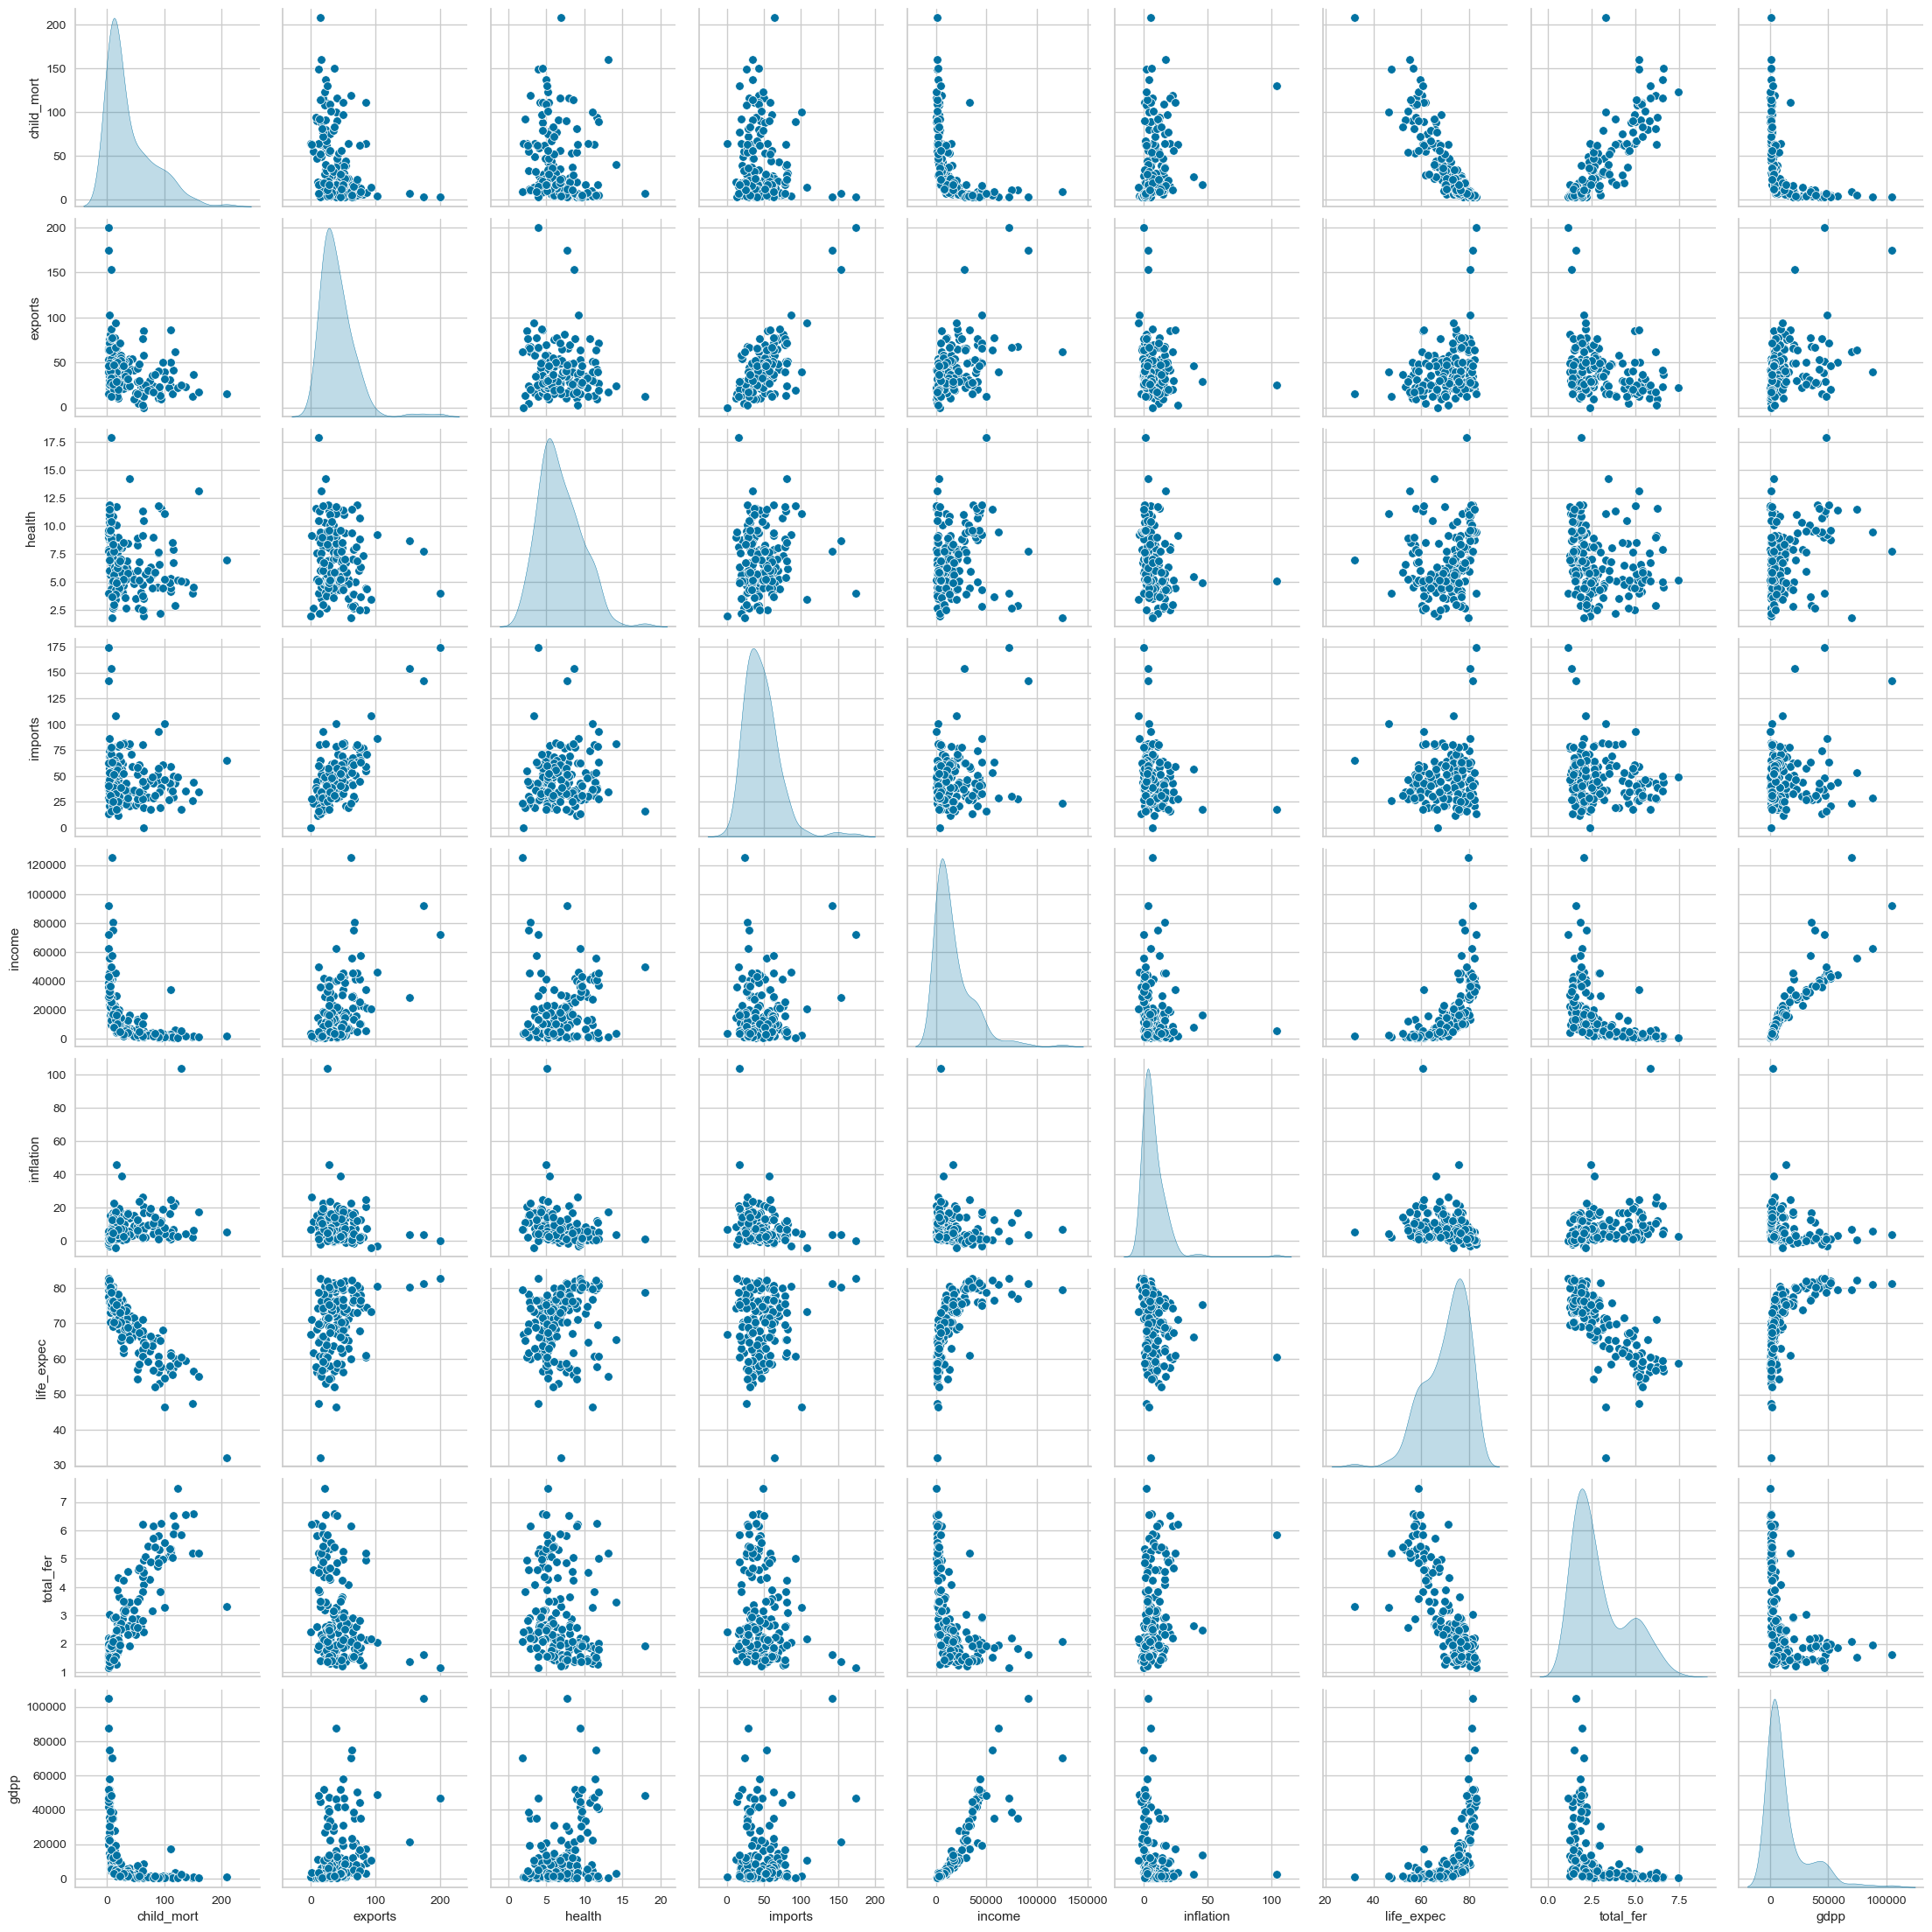

In [15]:
# Multivariate analysis
sns.pairplot(data,diag_kind='kde')
plt.show()

## Data Preprocessing

In [16]:
# Check for missing values
data.isnull().sum().sum()
# no missing values

np.int64(0)

In [17]:
# Lets treat the extreme outliers
# We will go with capping using IQR
# in order to cape only the extreme one lets keep whisker length = 2.5
for i in data.columns:
    q1,q3=np.quantile(data[i],[0.25,0.75])
    iqr=q3-q1
    ul,ll=q3+2.5*iqr,q1-2.5*iqr
    data[i]=data[i].apply(lambda x: ul if x>ul else ll if x < ll else x)

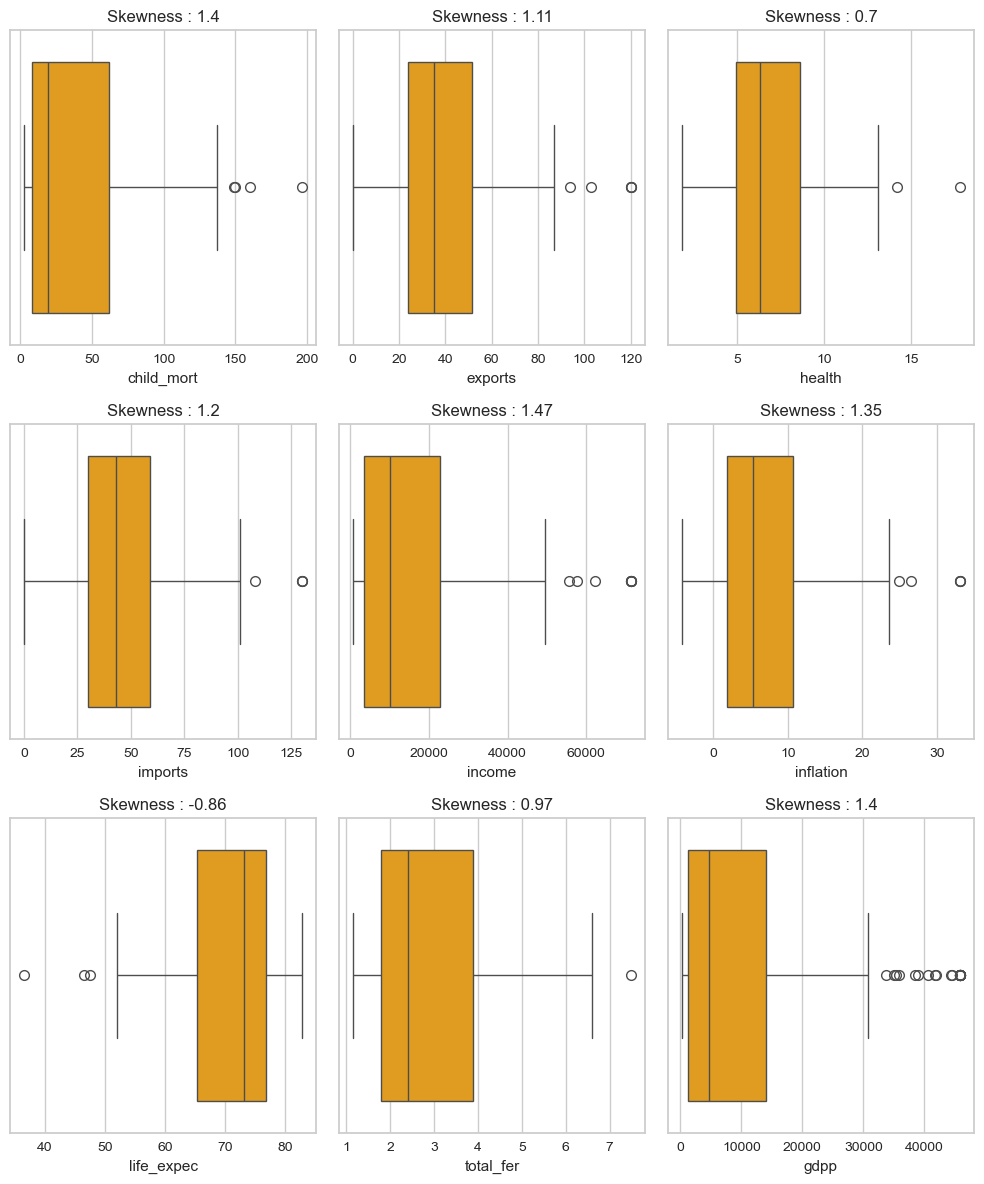

In [18]:
t=1
plt.figure(figsize=(10,12))
for i in data.columns:
    plt.subplot(3,3,t)
    sns.boxplot(data=data,x=i,color='orange')
    plt.title(f'Skewness : {round(data[i].skew(),2)}')
    t+=1
plt.tight_layout()
plt.show()

In [19]:
# Lets create an instance of scalling
scaler=StandardScaler()

# Also lets create an instance for PCA
pca=PCA(n_components=5,random_state=2) # change 9 to 5 pca.explained_variance_ratio_.cumsum() after this

# Lets create pipline for the above two process
pipline=Pipeline([('Scale',scaler),('PCA',pca)])

In [20]:
pipline.fit(data)

Pipeline(steps=[('Scale', StandardScaler()),
                ('PCA', PCA(n_components=5, random_state=2))])

In [21]:
pca.explained_variance_ratio_.cumsum()

# At n-components=5 we are able to explained approx 95 % variance which is good enough.
# so 9-D data can be reduce to 5-D.

array([0.4758564 , 0.64300208, 0.77845398, 0.88018006, 0.94647697])

In [22]:
final_data=pipline.transform(data)

In [23]:
# .transform return the array lets convert it into dataframe
final_data=pd.DataFrame(final_data,columns=['PC1','PC2','PC3','PC4','PC5'],index=data.index)

In [24]:
final_data

PC1       PC2       PC3       PC4       PC5
country                                                              
Afghanistan         -3.043637 -0.201155  0.951322  0.793445 -0.006800
Albania              0.423415 -0.371463  0.171749 -1.353581  0.088623
Algeria             -0.404684 -0.440312 -1.636775 -0.573008  0.397119
Angola              -3.150063  1.425283 -1.784982  1.580071  0.142609
Antigua and Barbuda  1.145313  0.392985  0.151332 -0.823193 -0.370311
...                       ...       ...       ...       ...       ...
Vanuatu             -0.828141  0.812072  0.314558 -0.715821 -0.527346
Venezuela           -0.572007 -1.456583 -3.029355  0.232195  1.994067
Vietnam              0.391400  1.868710 -0.234175 -0.909466  1.304821
Yemen               -2.149101 -0.302415 -1.489883  0.348609  1.128099
Zambia              -3.010673  0.216450 -0.245995  0.970270 -0.008693

[167 rows x 5 columns]

## K-Means Clustering

In [25]:
# Indentify the value of k
# Kelbow visualize
kelbow=KElbowVisualizer(estimator=KMeans(random_state=2),k=10)

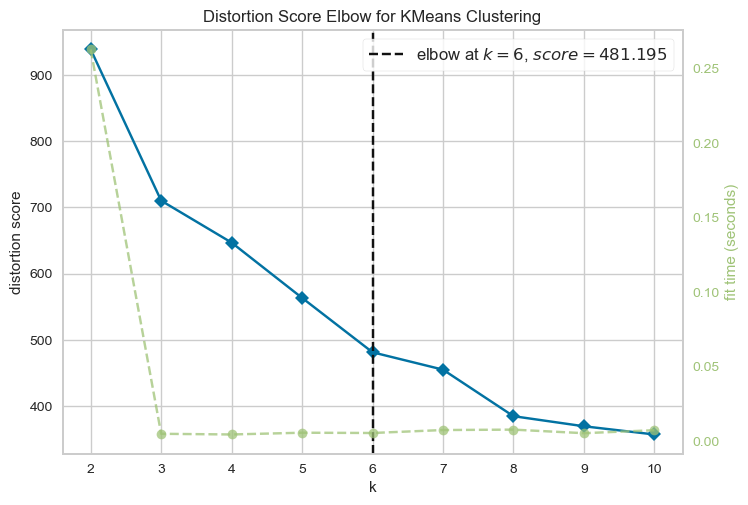

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kelbow.fit(final_data)
kelbow.show()

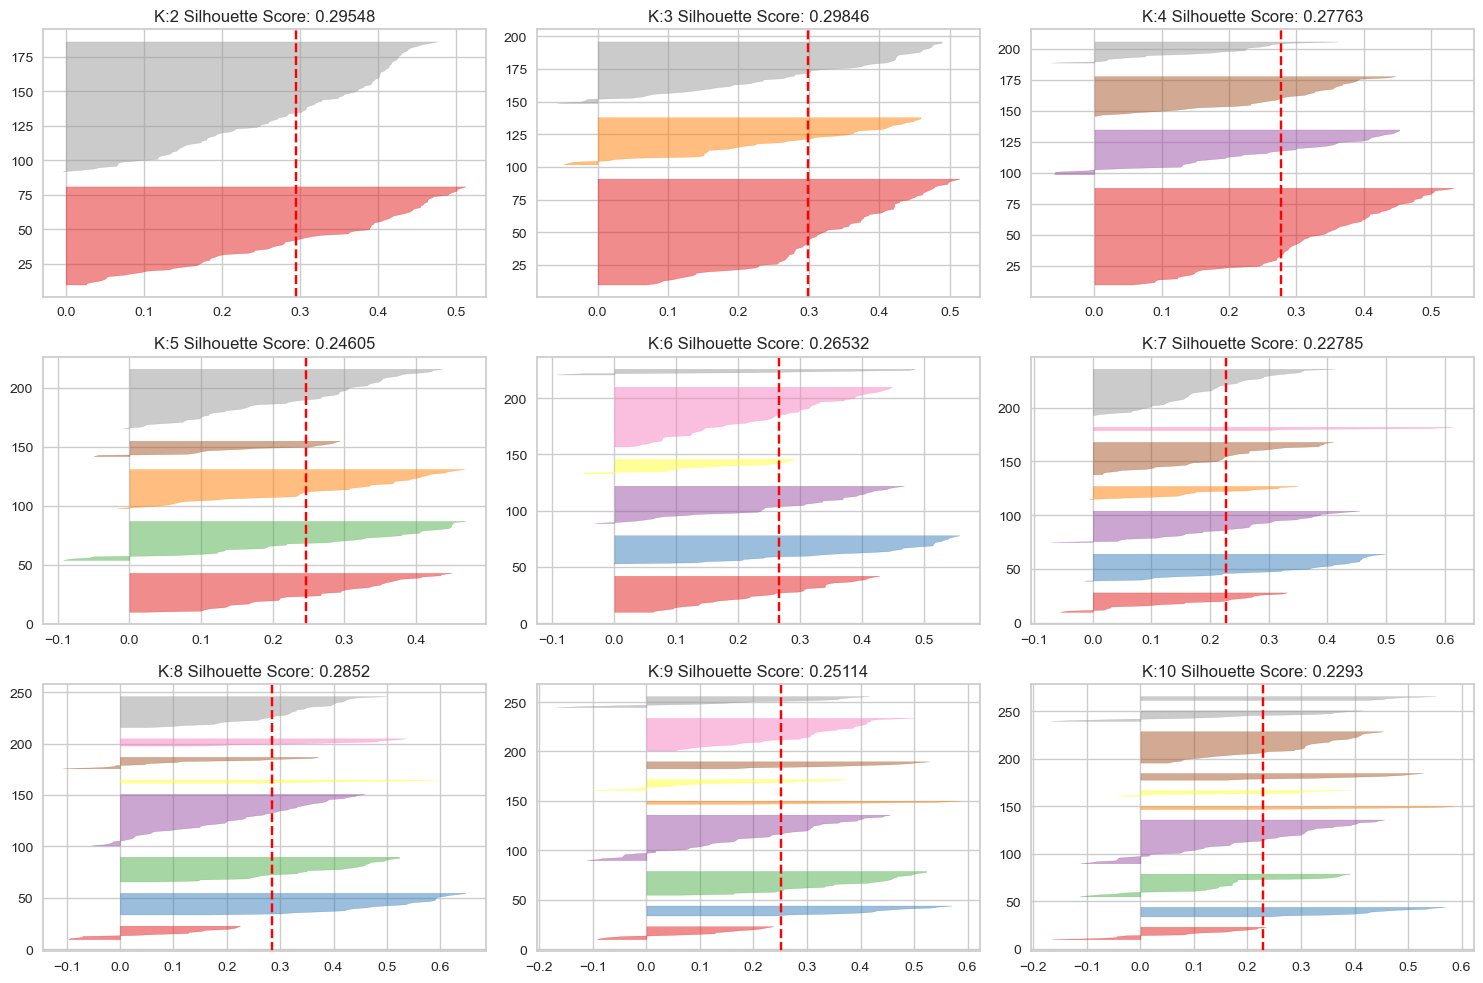

In [27]:
t=1
plt.figure(figsize=(15,10))
for i in range(2,11):
    plt.subplot(3,3,t)
    model=KMeans(n_clusters=i,random_state=2)
    sil_viz=SilhouetteVisualizer(model)
    sil_viz.fit(final_data)
    plt.title(f'K:{i} Silhouette Score: {round(sil_viz.silhouette_score_,5 )}') 
    t+=1

plt.tight_layout()
plt.show()
# (12:21)

After analysing K-elbow plot and silhoutte visualizer let go with k=3 although their are few data points that has been misclassifing but we see no drop in silvoutte score and their is good enough data in every cluster also from kelbow plot significant drop in WCSS(Distortion score) was observed from k= 2 to k=3.

In [28]:
final_kmeans=KMeans(n_clusters=3,random_state=2)

In [29]:
labels=final_kmeans.fit_predict(final_data)

In [30]:
# lets print the silhoutte score
print('Silhoutte score:',silhouette_score(final_data,labels))

Silhoutte score: 0.29845782348296623


In [31]:
# Let put these label on PCA data
final_data['Labels']=labels

In [32]:
final_data

PC1       PC2       PC3       PC4       PC5  Labels
country                                                                      
Afghanistan         -3.043637 -0.201155  0.951322  0.793445 -0.006800       2
Albania              0.423415 -0.371463  0.171749 -1.353581  0.088623       0
Algeria             -0.404684 -0.440312 -1.636775 -0.573008  0.397119       0
Angola              -3.150063  1.425283 -1.784982  1.580071  0.142609       2
Antigua and Barbuda  1.145313  0.392985  0.151332 -0.823193 -0.370311       0
...                       ...       ...       ...       ...       ...     ...
Vanuatu             -0.828141  0.812072  0.314558 -0.715821 -0.527346       0
Venezuela           -0.572007 -1.456583 -3.029355  0.232195  1.994067       0
Vietnam              0.391400  1.868710 -0.234175 -0.909466  1.304821       0
Yemen               -2.149101 -0.302415 -1.489883  0.348609  1.128099       2
Zambia              -3.010673  0.216450 -0.245995  0.970270 -0.008693       2

[167 rows x 6 columns]

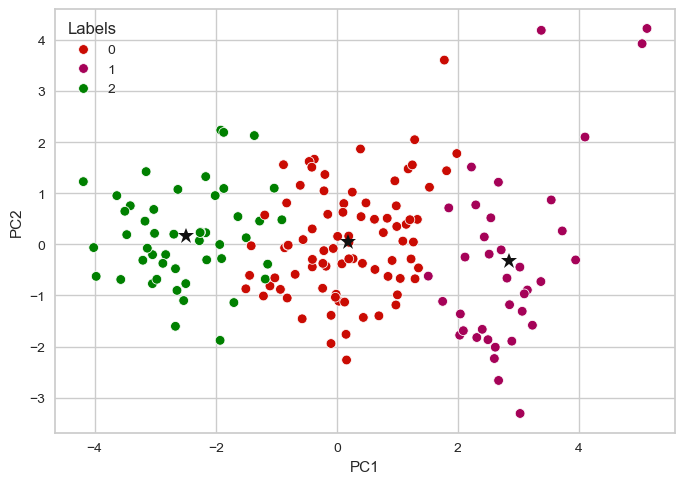

In [33]:
# Lets visualize the clusters
# in order to get the best visualization lets choose PC1 and PC2 as they have maximum variance
centroids=final_kmeans.cluster_centers_
centroids\

sns.scatterplot(data=final_data,x='PC1',y='PC2',palette=['r','m','green'],hue='Labels')
for i in range(3):
     plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=12,color='k')
plt.show()

## Business Interpretation

In [37]:
# To have business understanding lets put the labels on the iriginal dataset
data['Label']=labels
data.head(2)


child_mort  exports  health  imports  income  inflation  \
country                                                                
Afghanistan        90.2     10.0    7.58     44.9  1610.0       9.44   
Albania            16.6     28.0    6.55     48.6  9930.0       4.49   

             life_expec  total_fer    gdpp  Label  
country                                            
Afghanistan        56.2       5.82   553.0      2  
Albania            76.3       1.65  4090.0      0

In [38]:
data.groupby(by='Label').mean()

child_mort    exports    health    imports        income  inflation  \
Label                                                                        
0       21.508537  40.797317  6.231951  48.097561  12281.097561   7.474744   
1        5.237838  53.575000  8.780270  49.129054  42690.878378   2.588432   
2       92.131771  28.546229  6.296458  41.443040   3937.770833  10.438854   

       life_expec  total_fer          gdpp  
Label                                       
0       72.875610   2.311707   6291.146341  
1       79.956757   1.755676  36905.405405  
2       59.438542   4.953958   1902.916667

After studing the above data we can conclude that countries that have the assigned to cluster 2 can be called Underdeveloped while cluster 1 are Develoved. countries belonging to cluster 0 are doing average in most of the factor but struggling to some economiv factor like GDPP/Income and Expenditure on health hence they can be called develping

In [39]:
data['Label']=data['Label'].map({0:'Developing',1:'Developed',2:'Underdeveloped'})

In [40]:
data.head(3)

child_mort  exports  health  imports   income  inflation  \
country                                                                 
Afghanistan        90.2     10.0    7.58     44.9   1610.0       9.44   
Albania            16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria            27.3     38.4    4.17     31.4  12900.0      16.10   

             life_expec  total_fer    gdpp           Label  
country                                                     
Afghanistan        56.2       5.82   553.0  Underdeveloped  
Albania            76.3       1.65  4090.0      Developing  
Algeria            76.5       2.89  4460.0      Developing

In [41]:
# Developed Countries
data[data['Label']=='Developing'].index

Index(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Azerbaijan', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia',
       'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya', 'Lithuania',
       'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco',
       'Nepal', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Romania', 'Russia', 'Samoa', 'Saudi Arabia', 'Serbia', 'Seychelles',
       'Solomon Islands', 'Sri Lanka', 'St. Vincent and the Grenadines',
       'Suriname', 'Tajikistan', '

In [42]:
# Undereveloped Countries
data[data['Label']=='Underdeveloped'].index

Index(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cote d'Ivoire', 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar',
       'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste',
       'Togo', 'Uganda', 'Yemen', 'Zambia'],
      dtype='object', name='country')

In [43]:
# Developing Countries
data[data['Label']=='Developed'].index

Index(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates',
       'United Kingdom', 'United States'],
      dtype='object', name='country')

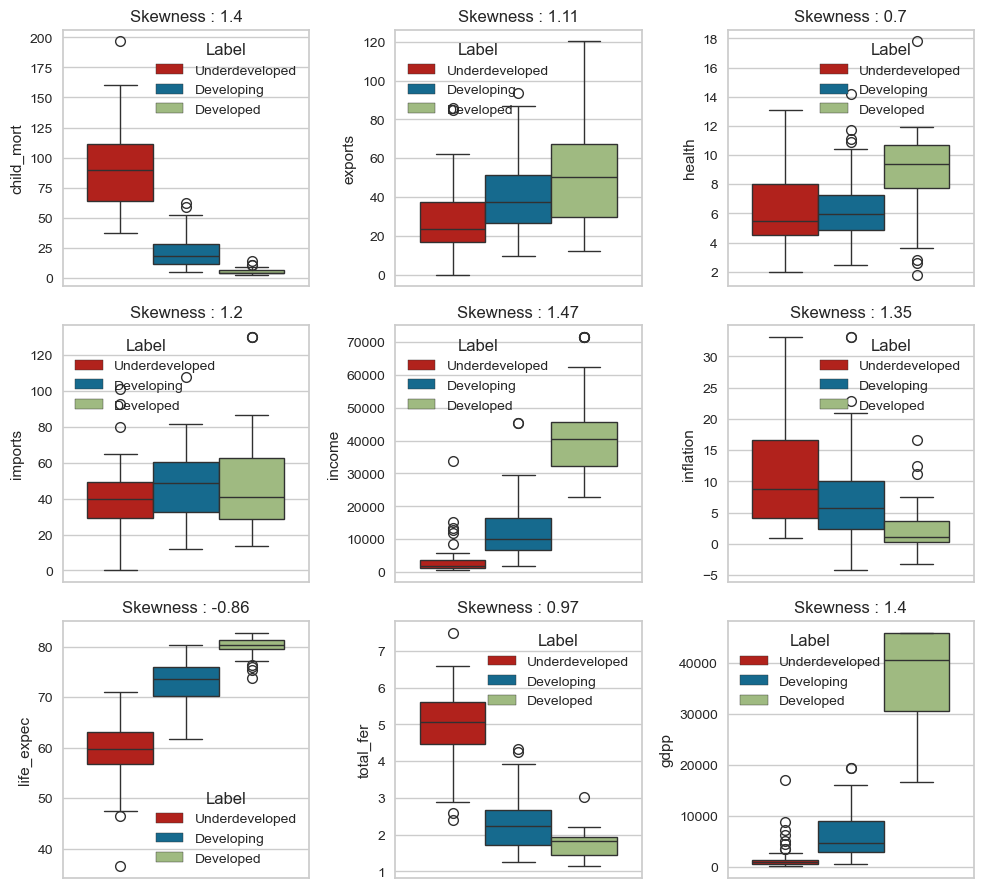

In [44]:
t=1
plt.figure(figsize=(10,12))
for i in data.columns:
    if i != 'Label':
        plt.subplot(4,3,t)
        sns.boxplot(data=data,y=i,hue='Label',palette=['r','b','g'])
        plt.title(f'Skewness : {round(data[i].skew(),2)}')
        t+=1
plt.tight_layout()
plt.show()

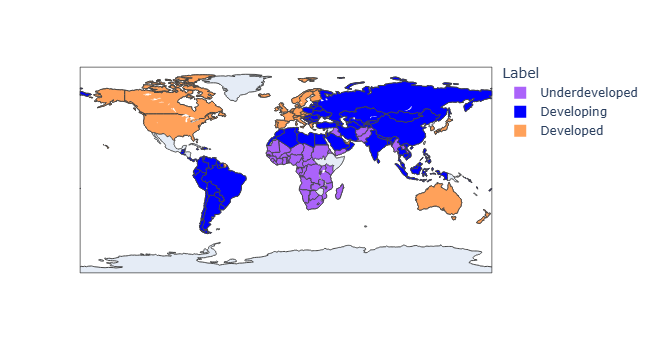

In [45]:
# World map
px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='Label',color_discrete_map={'Underdoveloped':'red','Developing':'blue','Develpoed':'green'})

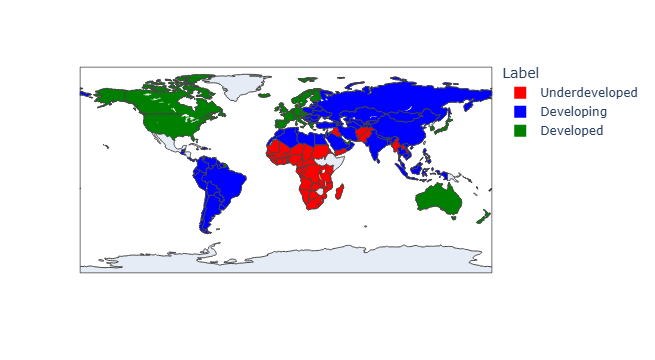

In [46]:
fig = px.choropleth(
    data_frame=data,
    locationmode='country names',
    locations=data.index,
    color='Label',
    hover_name=data.index,   # ✅ THIS FIXES IT
    color_discrete_map={
        'Underdeveloped': 'red',
        'Developing': 'blue',
        'Developed': 'green'
    }
)

fig.show()


## Deployment

In [ ]:
input_data=data.iloc[0,:-1].values
input_data

In [ ]:
final_input_list=pipline.transform([input_data])
final_input_data

In [ ]:
final_kmeans.predict(final_input_list)[0]

In [ ]:
data

In [ ]:
data.iloc

In [ ]:
with open('pipeline.joblib','wb') as file:
    joblib.dump(pipline,file)

In [ ]:
with open('model.joblib','wb') as file:
    joblib.dump(KMeans,file)